# Makie Workshop

## About Me

* Started using Julia ~2012
* Author of Makie
* Maintainer of the Makie ecosystem 
    * Tyler, GeoMakie, AlgebraOfGraphics, Bonito
* Freelance Open Source Developer

## About the Workshop

* Introduction to Makie
* Introduction to plotting Geo data
* Building Apps with Bonito & Makie
* Reference further material

## What is Makie 

* Modern plotting library for Julia 
* Easy to use, yet fast and powerful
* General-purpose tool that makes as few compromises for specialized use cases as possible

## Rich Ecosystem

* [makie.org](https://makie.org)
* [Beautiful Makie](https://beautiful.makie.org)

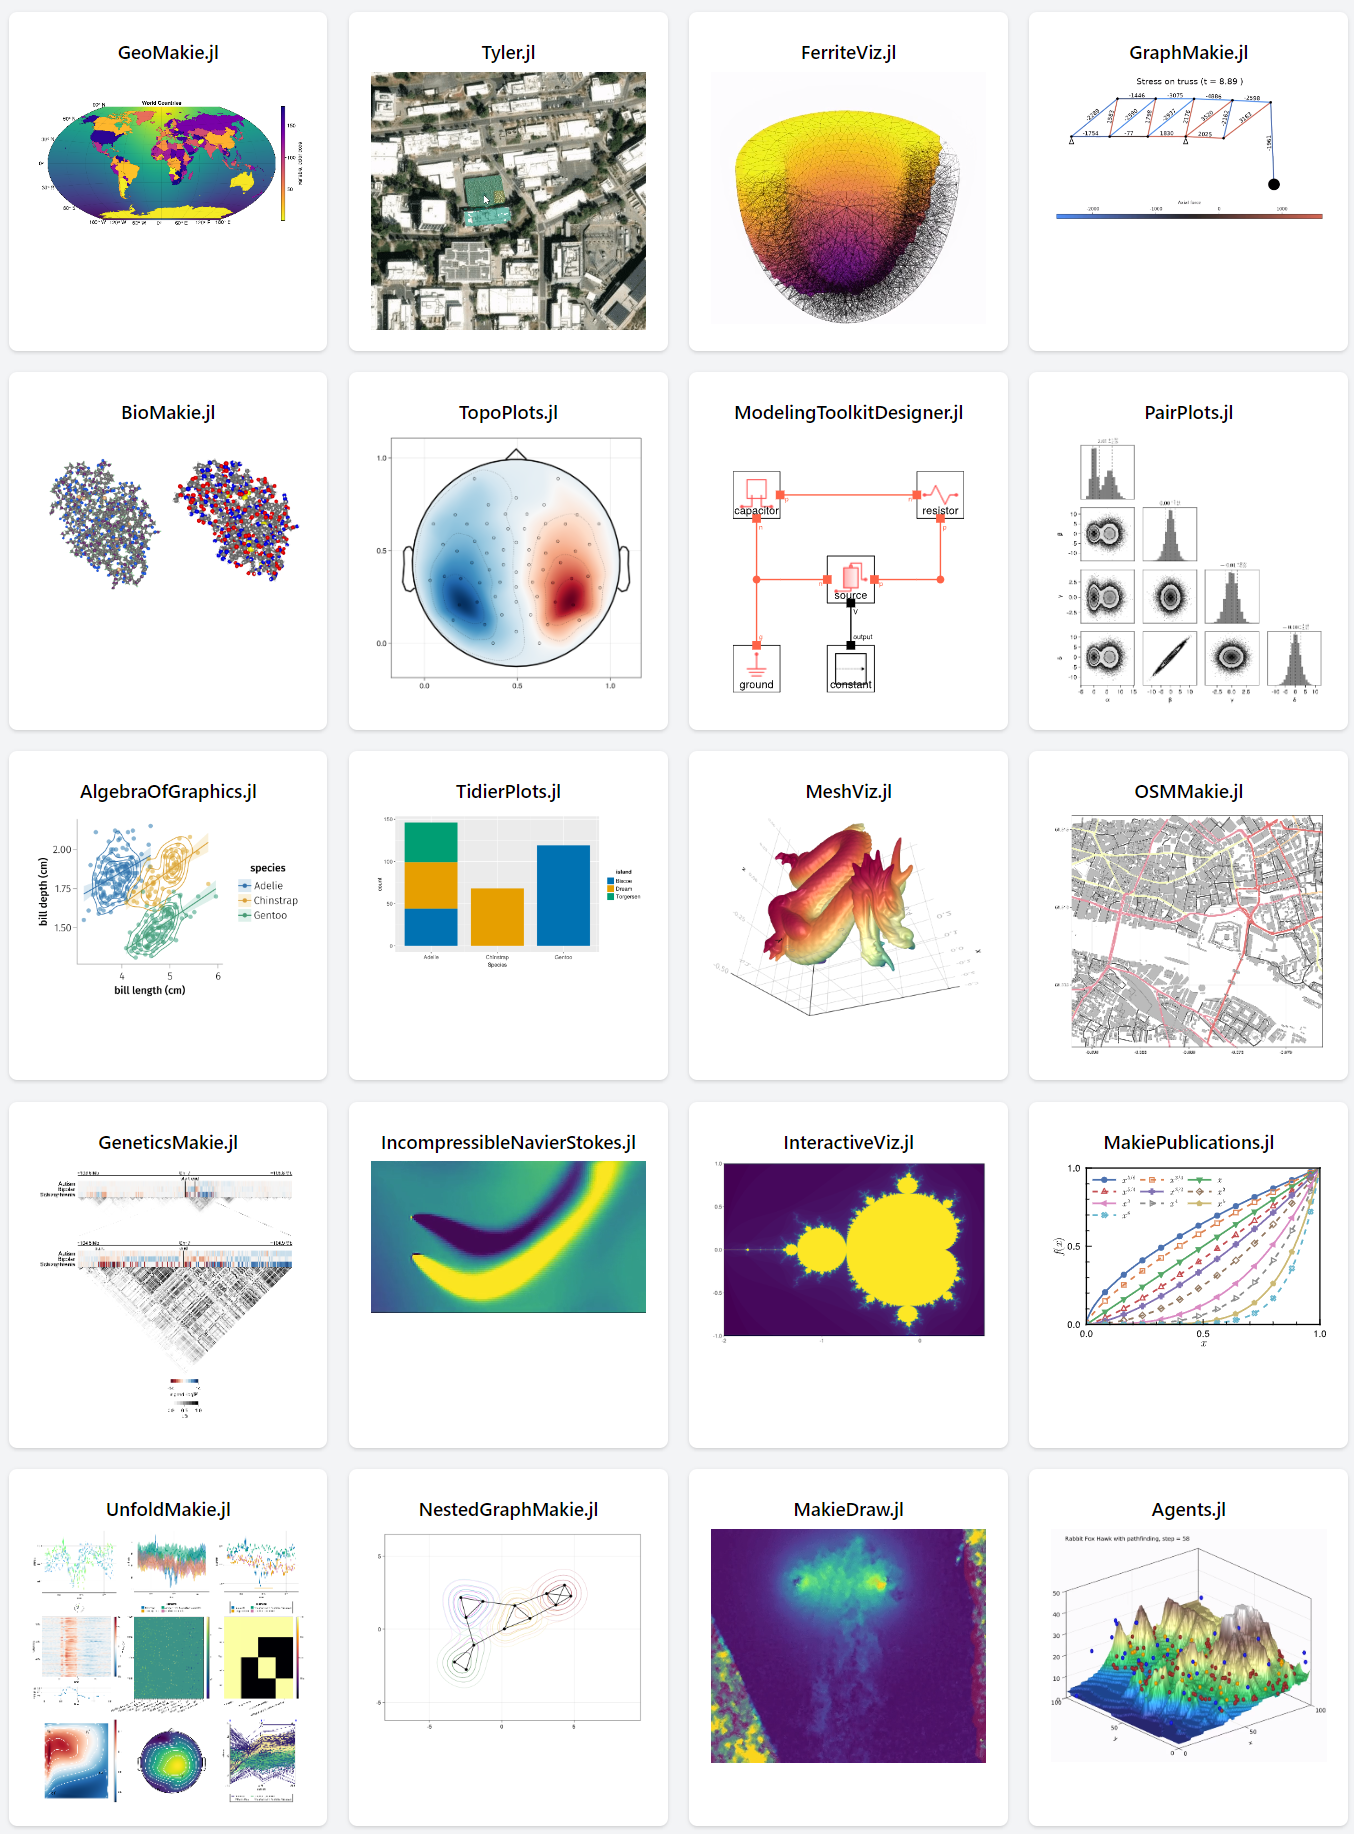

## Backends

- Flexibility comes from having backends for each special purpose
- All plotting is defined in Makie.jl
- Backends only define how to draw the basic plot types constructed with Makie

### [GLMakie](https://docs.makie.org/stable/documentation/backends/glmakie/index.html)

-   The first backend and the most feature complete
-   Uses the GPU via OpenGL for 3D animations
-   Basic UI elements for simple Dashboards
-   Needs a GPU, [or a virtual GPU (e.g. Mesa, VirtualGL)](https://docs.makie.org/stable/documentation/headless/index.htl#glmakie)

![](https://makie.org/jsserve/png/glmakie.png)

### [CairoMakie](https://docs.makie.org/stable/documentation/backends/cairomakie/index.html)

-   Best 2D rendering quality
-   Can export SVGs, PDFs, etc
-   3D support experimental
-   Not interactive (but can still be used for animations etc)
-   Runs everywhere on the CPU


![](https://makie.org/jsserve/svg/cairomakie.svg)

### [WGLMakie](https://docs.makie.org/stable/documentation/backends/wglmakie/index.html)

-   Creates visualizations via threejs and webgl in the browser
-   Similar to GLMakie, but less mature
-   Can be fast for visualizing large data, but has an overhead for transfering data to browser
-   Mostly feature complete, with some things still missing (e.g. line joints)
-   Runs almost everywhere on the GPU
-   Great for working on remote machines, websites or notebooks

In [ ]:
HTML("""
    <video autoplay muted loop>
        <source src="https://makie.org/jsserve/mp4/wglmakie.mp4" type="video/mp4">
    </video>
""")

### [RPRMakie](https://docs.makie.org/stable/documentation/backends/rprmakie/index.html)

-   Newest, supports only a subset of Makie (mostly the 3d primitives)
-   Very slow, needs high-end hardware for high quality animations
-   Still has lots of bugs
-   Looks amazing when it works :)

  
![](https://makie.org/jsserve/png/earths_creditst.png)

## Getting started

* use juliaup to get Julia 1.10
    * windows 
    ```sh
    winget install julia -s msstore
    ```
    * Linux/OSX
    ```sh
    curl -fsSL https://install.julialang.org | sh
    ```

```sh
juliaup add 1.10
juliaup default 1.10
julia # start Julia REPL
```

```julia
]add IJulia
using IJulia; IJulia.jupyterlab(dir=pwd())
```

In [ ]:
]activate .; instantiate; precompile; st

In [ ]:
using WGLMakie, GLMakie # use a backend of your choice
# We use WGLMakie, since we're in a notebook and want to build web apps
WGLMakie.activate!() # Globally sets WGLMakie as the default for displaying Makie plots

In [ ]:
?WGLMakie.activate!

## Figure and Axes

* Figure is the most top level object holding the layout, axes, blocks and scenes 
* Axes hold the actual plot objects and coordinate system
* Scene are like a drawing canvas - the most low level primitive in Makie

In [ ]:
f = Figure(backgroundcolor = :tomato, size=(600, 300))
ax1 = Axis(f[1, 1];
    title = "A Makie Axis",
    xlabel = "The x label",
    ylabel = "The y label")
ax2 = Axis(f[1, 2])
f

In [ ]:
?Axis

In [ ]:
?Axis.title

In [ ]:
f = Figure()

Axis(f[1, 1], title = "Title")
Axis(f[2, 1], title = L"\sum_i{x_i \times y_i}")
Axis(f[3, 1], title = rich(
    "Rich text title",
    subscript(" with subscript", color = :slategray)
))

f

## Theming 

* [Theming Docs](https://docs.makie.org/stable/explanations/theming/)

In [ ]:
theme = (
    backgroundcolor = (:silver, 0.1), 
    size = (900, 400), 
    markersize = 10, # globally 
    Axis=(; title="Makie Workshop"), 
    Lines=(; linewidth=4)
)

set_theme!(; theme...) # set a theme Globally
with_theme(; theme...) do 
    # set theme only during do block
    Figure()
end
# Set theme for a figure
Figure(; theme...);

### Plotting into Axis

In [ ]:
f = Figure()
ax = Axis(f[1, 1])
x = range(0, 10, length=100)
y = sin.(x)
lines!(ax, x, y) # all plotting funtions can plot into an axis
f

### Shorthands

* plot(...) # Create figure, axis, and plot in one call
* plot(f[i, j], ...) # Create new axis + plot in grid position (i, j)
* plot!(axis, ...) # Create plot in axis
* plot!(scene, ...) # Create plot in scene (low level!!)

In [ ]:
x = range(0, 10, length=100)
# shorthand to create axis and figure in one call
figure, axis, plot = lines(x, sin; figure=(;), axis=(;))

#### Colors

In [ ]:
function color_example()
    x = 1:10
    y = fill(0, length(x))
    f = Figure(markersize=30)
    
    # 1 color for all points
    ax, pl = scatter(f[1, 1], x, y, color = "red", label="css colors")
    scatter!(x, y .+ 0.2, color = RGBAf(0, 0.5, 1, 0.5), label="rgba")
    
    # 1 color per point
    scatter!(x, y .+ 0.6, alpha=0.5, color = LinRange(colorant"yellow", colorant"blue", length(x)), label="array of colors")
    
    # numbers mapped to a colormap
    scatter!(x, y .+ 0.4, color = x, colormap = :viridis, label="named colormap")
    scatter!(x, y .+ 0.8, color = x, colormap = ["darkred", "black"], label="colormap array of colors")
    colors = Float64[x;]; colors[5:6] .= NaN
    scatter!(x, y .+ 1, 
        color = colors, colormap = :Greens, 
        colorrange=(3, 8), 
        lowclip=:red, highclip=:black, nan_color=:orange,
        label="colormap attributes"
    )
    # update ticks to show the plot labels
    ax.yticks = (0:0.2:1, map(x-> x.label[], ax.scene.plots))
    return f, ax
end
f, ax = color_example()
f

#### Where to find colors?

* [Makie color docs](https://docs.makie.org/stable/explanations/colors)
* [Colors.jl docs](https://juliagraphics.github.io/Colors.jl/stable/namedcolors/)
* `Colors.color_names`
* `Makie.all_gradient_names`

In [ ]:
Makie.Colors.color_names

In [ ]:
Makie.all_gradient_names # Or to get a printed out version Makie.available_gradients()

In [ ]:
subtypes(Makie.Colors.Color) # Doesn't only support RGB(A)

## Legend and Colorbar 
* [Legend docs](https://docs.makie.org/stable/reference/blocks/legend)
* [Colorbar docs](https://docs.makie.org/stable/reference/blocks/colorbar/)

In [ ]:
f, ax = color_example()
axislegend(ax; backgroundcolor=(:white, 0.9));
f

In [ ]:
f, ax = color_example()
hideydecorations!(ax)
Legend(f[1, 2], ax)
f

In [ ]:
x = pi:0.1:5pi
colors = [x...]; colors[end-5:end] .= NaN
f, ax, plotobject = scatter(
    x, cos, 
    color=colors, 
    colormap=:rainbow, 
    colorrange=(2pi, 4pi), 
    lowclip=:red, highclip=:black, nan_color=:orange)

Colorbar(f[1, 1], plotobject; label="inset",
    width=Relative(0.3),
    vertical=false,
    height=20,
    tellwidth=false, tellheight=false,
    halign=0.5,
    valign=0.8)

Colorbar(f[1, 2], plotobject; label="Colorbar")

f

### Layouting

If you ask, "can this layout be done", the answer is most certainly yes!

* [Full layout tutorial](https://docs.makie.org/stable/tutorials/layout-tutorial/)
* [JuliaCon Layout workshop](https://youtu.be/VT1XY1-fNlY?t=2252)

### Axis and Blocks

[All blocks](https://docs.makie.org/stable/reference/blocks)

In [ ]:
[subtypes(Makie.Block); subtypes(Makie.AbstractAxis);]

In [ ]:
using FileIO
x = range(0, 10, length=100)
f = Figure(size=(1200, 800))
brain = load(Makie.assetpath("brain.stl"))
brain_color = getindex.(brain.position, 3)

scatter(f[1, 1], x, sin; axis=(; type=Axis, title="Axis"))

mesh(f[1, 2], brain; color=brain_color, axis=(; type=LScene))

meshscatter(f[2, 1], 1:5, 1:5, zeros(5, 5), markersize=Vec3f.(1, 1, rand(25)), marker=Rect3f(Vec3f(-0.5, -0.5, 0), Vec3f(1)), axis=(;type=Axis3, title="Axis3"))

scatter(f[2, 2], cos.(x), x; markersize=15, axis=(; type=PolarAxis, title="PolarAxis"))

f

* LScene is pretty basic, but has a great [3D camera](https://docs.makie.org/stable/explanations/cameras/#3d_camera)

### Plot types
[All plot types in docs](https://docs.makie.org/stable/reference/plots/)

In [ ]:
?lines

In [ ]:
Makie.available_plotting_methods()

#### Contourf

In [ ]:
using DelimitedFiles

volcano = readdlm(Makie.assetpath("volcano.csv"), ',', Float64)

f = Figure()
ax = Axis(f[1, 1])

co = contourf!(volcano,
    levels = range(100, 180, length = 10),
    extendlow = :cyan, extendhigh = :magenta)

tightlimits!(ax)

Colorbar(f[1, 2], co)

f

### Surface

In [ ]:
f, ax, surface_plot = surface(volcano,
    colormap = :darkterrain,
    colorrange = (80, 190),
    axis=(type=Axis3, azimuth = pi/4))

In [ ]:
surface_plot.colormap = :viridis
surface_plot[1] = volcano .+ randn(size(volcano));

### Surface and irregular grids

In [ ]:
n = 10
θ = [0; (0.5:n - 0.5) / n;1]
φ = [(0:2n - 2) * 2 / (2n - 1);2]
x = [cospi(φ) * sinpi(θ) for θ in θ, φ in φ]
y = [sinpi(φ) * sinpi(θ) for θ in θ, φ in φ]
z = [cospi(θ) for θ in θ, φ in φ]
pts = vec(Point3f.(x, y, z))
f, ax, p = surface(x, y, z, color=Makie.logo())
WGLMakie.activate!()
f

#### Datashader

Visualizing billions of points interactively by aggregating large amount of points into images.


Inspired by [datashader](https://datashader.org/index.html).

In [ ]:
using Downloads, Parquet2
bucket = "https://ursa-labs-taxi-data.s3.us-east-2.amazonaws.com"
year = 2009
month = "01"
filename = join([year, month, "data.parquet"], "/")
out = joinpath("$year-$month-data.parquet")
url = bucket * "/" * filename
!isfile(out) && Downloads.download(url, out)
# Loading ~1.5s
ds = Parquet2.Dataset(out)

In [ ]:
dlat = Parquet2.load(ds, "dropoff_latitude")
dlon = Parquet2.load(ds, "dropoff_longitude")
points = Point2f.(dlon, dlat)
length(points) / 10^6 # ~14 mio points

In [ ]:
using GLMakie, GeoJSON
f, ax, pl = scatter(points; marker=Makie.FastPixel(), axis=(;aspect=DataAspect()), color=(:black, 0.1))
GLMakie.activate!()
display(f)

In [ ]:
function nyc_datashader()
    f, ax, dsplot = datashader(points;
        colormap=:fire,
        axis=(; type=Axis, autolimitaspect = 1),
        async=false,
        figure=(;figure_padding=0, size=(800, 400))
    )
    limits!(ax, (-74.06f0, -73.79f0), (40.68f0, 40.82f0))
    hidedecorations!(ax)
    hidespines!(ax)
    f, ax, dsplot
end
WGLMakie.activate!()
f, ax, pl = nyc_datashader()
f;

In [ ]:
using GLMakie

GLMakie.activate!()
f, ax, pl = nyc_datashader()
display(f)

## Overlaying Geo Data 

### GeoMakie

* Exports GeoAxis, which helps with transformations and ticks
* Adds conversions for Geo objects to be plotted with Makie

In [ ]:
using GeoJSON
geo = GeoJSON.read(read("nyc.geojson", String))

In [ ]:
using GeoMakie
WGLMakie.activate!()
f, ax, pl = nyc_datashader()
poly!(ax, geo, color=1:length(geo), colormap=(:viridis, 0.5), strokecolor=(:white, 0.5), strokewidth=1);
bd = Bonito.browser_display()
display(f; inline=false);

## Tyler

* Makie extension to view tiled map/satelite data
* Uses TileProvider for lots of map sources
* [Docs](https://makieorg.github.io/Tyler.jl/dev/)

In [ ]:
using Tyler
WGLMakie.activate!()
fig = Figure(size=(700, 700))
m = Tyler.Map(figure=fig, Rect2f(6, 35, 15, 15), scale=1.5)
hidedecorations!(m.axis)
fig

In [ ]:
using Tyler.TileProviders
providers = TileProviders.list_providers()

In [ ]:
provider = TileProviders.NASAGIBS(:ViirsEarthAtNight2012)
fig = Figure(size=(700, 700))
m = Tyler.Map(figure=fig, Rect2f(6, 35, 15, 15), scale=1.5, provider=provider, halo=0)
hidedecorations!(m.axis)
fig

In [ ]:
using Tyler.MapTiles
project(p) = Point2f(MapTiles.project(p, MapTiles.wgs84, MapTiles.web_mercator))
trans = Transformation(Makie.PointTrans{2}(project));

In [ ]:
rect = poly!(m.axis, Rect2f(6, 35, 15, 15), transformation=trans);

In [ ]:
delete!(m.axis, rect);

In [ ]:
using GeoJSON, GeoMakie

In [ ]:
it_states = joinpath(pwd(), "italy.geojson")
geo = GeoJSON.read(read(it_states, String))
italy = poly!(m.axis, geo, transformation=trans, color=1:length(geo), colormap=(:viridis, 0.5), strokecolor=(:white, 0.5), strokewidth=1);

In [ ]:
italy.color = rand(1:length(geo), length(geo));

## GeoAxis

* Convenince for setting dest and source projection
* Tries to create decent ticks for any projection

In [ ]:
fig = Figure()
ax = GeoAxis(fig[1,1]; dest="+proj=eqearth", source="+proj=longlat +datum=WGS84")
poly!(ax, GeoMakie.land(), color=(:black, 0.5))
fig

In [ ]:
using Zarr, YAXArrays, Dates, DimensionalData
store ="gs://cmip6/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1-2-HR/ssp585/r1i1p1f1/3hr/tas/gn/v20190710/"
g = open_dataset(zopen(store, consolidated=true))
c = g["tas"]
ct1 = c[Ti = Between(Date("2018-01-01"), Date("2018-02-01"))]

In [ ]:
lon = lookup(ct1, :lon)
lat = lookup(ct1, :lat);
@time data = ct1.data[:,:,:]; # actually download data
δlon = (lon[2]-lon[1])/2
nlon = lon .- 180 .+ δlon # shift around, so it goes from -180:180
ndata = circshift(data, (192,1));

In [ ]:
function earth_visualization(slice::Observable, projection::Observable, colormap::Observable)
    fig = Figure(size = (1000,400))
    ax = GeoAxis(fig[1,1]; dest=projection)
    slice_data = map(idx-> ndata[:, :, idx], slice)
    surface!(ax, nlon, lat, zeros(size(slice_data[])); color=slice_data, colormap=colormap)
    cl=lines!(ax, GeoMakie.coastlines(), color = :white, linewidth=0.85)
    translate!(cl, 0, 0, 1) # put coastlines infront of surface
    fig
end
slice = Observable(1);
projection = Observable("+proj=eqearth")
colormap = Observable(:viridis)
earth_visualization(slice, projection, colormap)

In [ ]:
slice[] = 10; colormap[] = :plasma;

## Interactive Bonito App

* Formerly called JSServe
* Workhorse behind WGLMakie
* Allows to render HTML and communicate with Javascript from Julia
* Has `Apps` which can be rendered in a notebook, on a website, or turned into static sites.

In [ ]:
using Bonito, WGLMakie
showit(x) = (Base.show(IOBuffer(), MIME"text/html"(), x); x)
app = App() do
    # of course it works well with WGLMakie :)
    return DOM.div(
        Centered(DOM.h2("This is a Bonito App using GeoMakie")),
        scatter(1:4; figure=(; size=(800, 300)));
        style=Styles("width"=>"800px")
    )
end

### Styling

* Styling is just CSS with Julia syntax
* Possible to create re-usable components
* [Styling Docs](https://simondanisch.github.io/Bonito.jl/stable/styling.html)
* Use ChatGPT! 😎

In [ ]:
app = App() do 
    style = Styles(
        CSS("color" => "gray", "font-size" => "2rem"),
        CSS(":hover", "color" => "red")
    )
    return Bonito.Button("click"; style=style)
end

In [ ]:
?Bonito.Button

### Bonito Components

* [Widgets](https://simondanisch.github.io/Bonito.jl/stable/widgets.html)
* [Layouting](https://simondanisch.github.io/Bonito.jl/stable/layouting.html)

In [ ]:
app = App() do 
    slider = Bonito.StylableSlider(1:10)
    button = Bonito.Button("click")
    dropdown = Bonito.Dropdown(["a", "b", "c"])

    widget_grid = Grid(
        Labeled(slider, slider.value),
        button, 
        dropdown; 
        align_content="space-evenly", height="fit-content")

    return DOM.div(widget_grid; style=Styles("width" => "200px", "margin" => "20px"))
end

## How to interact with Widgets

In [ ]:
app = App() do 
    slider = Bonito.StylableSlider(1:10)
    on(slider.value) do value 
        @show Int(value) 
    end
    
    new_value = map(slider.value) do value 
        value + 1
    end
    widget_grid = Grid(
        Labeled(slider, slider.value),
        new_value; 
        align_content="space-evenly", height="fit-content")

    return DOM.div(widget_grid; style=Styles("width" => "200px", "margin" => "20px"))
end

In [ ]:
app = App() do 
    slider = Bonito.StylableSlider(1:10)
    new_value = map(slider.value) do value 
        value * 5
    end
    widget_grid = Grid(
        Labeled(slider, slider.value),
        scatter(1:5, markersize=new_value); 
        align_content="space-evenly", height="fit-content")

    return DOM.div(widget_grid; style=Styles("width" => "200px", "margin" => "20px"))
end

## Interactive Earth data visualization App

* [Using YAXArrays](https://juliadatacubes.github.io/YAXArrays.jl/dev/examples/generated/Gallery/simplemaps)

In [ ]:
using WGLMakie, Bonito
app = App() do 
    slider = Bonito.StylableSlider(1:size(ndata, 3))
    projection = Dropdown(["+proj=moll",  "+proj=eqearth", "+proj=comill"])
    colormap = Dropdown([:seaborn_icefire_gradient, :amp, :turbid, :bam, :berlin])
    widget_grid = Grid(
        DOM.h2("Widgets"),
        DOM.h3("Time"),
        Labeled(slider, slider.value), 
        DOM.h3("Projection"),
        projection, 
        DOM.h3("Colormap"),
        colormap; 
        align_content="space-evenly", height="fit-content")
    
    sidebar = Card(
        widget_grid,
        style = Styles("grid-area" =>  "sidebar")
    )

    header = Card(
        Bonito.Centered(DOM.h1("Makie Workshop")),
        style = Styles("grid-area" =>  "header")
    )

    fig = earth_visualization(slider.value, projection.value, colormap.value)
    
    main = Card(
        WGLMakie.WithConfig(fig; resize_to=:parent),
        style = Styles("grid-area" =>  "main", "margin"=>"0px", "padding" => "0px")
    )

    grid = Grid(
        sidebar, header, main,
        columns = "200px 1fr",
        rows = "70px 1fr",
        areas = """
            'sidebar header'
            'sidebar main';
        """
    )
    return DOM.div(grid; style=Styles("height" => "500px","width" => "1000px"))
end

## Deploying Bonito Apps

* [Deployment Docs](https://simondanisch.github.io/Bonito.jl/stable/deployment.html)

### Server

In [ ]:
server = Bonito.Server("0.0.0.0", 8080)

In [ ]:
# server.proxy_url="http://bonito-makie.ddns.net:8081"
route!(server, "/" => app);

In [ ]:
DOM.a("go to server", href=online_url(server, ""))

#### Bonito Makie examples 

[bonito-makie.ddns.net:8081](http://bonito-makie.ddns.net:8081/)

### Static export for e.g. Github

In [ ]:
routes = Routes(
    "/" => app
)
Bonito.export_static("html", routes)

In [ ]:
using LiveServer; LiveServer.serve(port=8081, dir="html")

## Self contained HTML file

In [ ]:
Bonito.export_static("geo-app.html", app);

* [Plotting Docs](https://simondanisch.github.io/Bonito.jl/stable/plotting.html)
* [Static Sites Docs](https://simondanisch.github.io/Bonito.jl/stable/static.html)
* [WGLMakie Docs](https://docs.makie.org/stable/explanations/backends/wglmakie/)